# Checkpoint 1

Reminder: 

- You are being evaluated for completion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@". 

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
df = pd.read_csv("/mnt/c/Users/rohit/Downloads/MDST-Onboarding-main/MDST-Onboarding-main/data/states_edu.csv")
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: Grade 4 Math

How many years of data are logged in our dataset? 

In [3]:
# @@@ 1
# Your Code
df["YEAR"].nunique()

33

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [9]:
# @@@ 2

mi_oh = df[df["STATE"].isin(["MICHIGAN", "OHIO"])]

average_scores = mi_oh.groupby("STATE")["AVG_MATH_4_SCORE"].mean()

higher = average_scores.idxmax()
higher

'OHIO'

Find the average for your chosen test across all states in 2019

In [10]:
# @@@ 3

df.groupby("STATE")["AVG_MATH_4_SCORE"].mean()


STATE
ALABAMA                 226.090909
ALASKA                  234.777778
ARIZONA                 230.909091
ARKANSAS                231.545455
CALIFORNIA              227.909091
COLORADO                239.400000
CONNECTICUT             239.909091
DELAWARE                237.200000
DISTRICT_OF_COLUMBIA    216.545455
DODEA                   241.600000
FLORIDA                 238.800000
GEORGIA                 232.545455
HAWAII                  232.181818
IDAHO                   237.000000
ILLINOIS                235.400000
INDIANA                 241.181818
IOWA                    240.090909
KANSAS                  242.600000
KENTUCKY                233.636364
LOUISIANA               226.636364
MAINE                   240.000000
MARYLAND                236.818182
MASSACHUSETTS           246.000000
MICHIGAN                234.363636
MINNESOTA               245.000000
MISSISSIPPI             226.272727
MISSOURI                236.090909
MONTANA                 240.400000
NATIONAL      

For each state, find a maximum value for your chosen test score

In [16]:
# @@@ 4
df.groupby("STATE")["AVG_MATH_4_SCORE"].idxmax()

STATE
ALABAMA                 1071
ALASKA                   766
ARIZONA                 1073
ARKANSAS                1074
CALIFORNIA              1666
COLORADO                1076
CONNECTICUT              873
DELAWARE                1078
DISTRICT_OF_COLUMBIA    1670
DODEA                   1671
FLORIDA                 1344
GEORGIA                 1081
HAWAII                  1082
IDAHO                    675
ILLINOIS                 982
INDIANA                 1085
IOWA                    1086
KANSAS                   781
KENTUCKY                1190
LOUISIANA               1191
MAINE                   1090
MARYLAND                 989
MASSACHUSETTS            990
MICHIGAN                 685
MINNESOTA               1094
MISSISSIPPI             1687
MISSOURI                 892
MONTANA                  791
NATIONAL                1657
NEBRASKA                1470
NEVADA                   997
NEW_HAMPSHIRE           1100
NEW_JERSEY               795
NEW_MEXICO              1000
NEW_YORK

*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [50]:
# @@@ 5

df["expenditure_per_student"] = df["TOTAL_EXPENDITURE"] / df["GRADES_ALL_G"]
df["average_reading_to_math_score"] = df["AVG_READING_4_SCORE"] / df["AVG_MATH_4_SCORE"]
df.head()



,PRIMARY_KEY,STATE,YEAR,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,expenditure_per_student,average_reading_to_math_score
0,1992_ALABAMA,ALABAMA,1992,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,...,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,3.627221,0.995192
1,1992_ALASKA,ALASKA,1992,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,...,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN,7.939520,NaN
2,1992_ARIZONA,ARIZONA,1992,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,...,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,5.050774,0.972093
3,1992_ARKANSAS,ARKANSAS,1992,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,...,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3.948044,1.004762
4,1992_CALIFORNIA,CALIFORNIA,1992,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,...,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,5.164536,0.971154


Feature engineering justification: **<I decided to use your advice and insert a feature of expenditure_per_student to see how much money was being spent on each student. Then you could also look at AVG_MATH_4_SCORE, which then you could corralate that to the expenditure per student in that state to see if there is any relationship between the two. I also made a feature of a ratio of reading to math score to see generally which states perform better at which subject. If the ratio is above 1 that states perform better at reading, and if below 1 that state performs better at math.>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

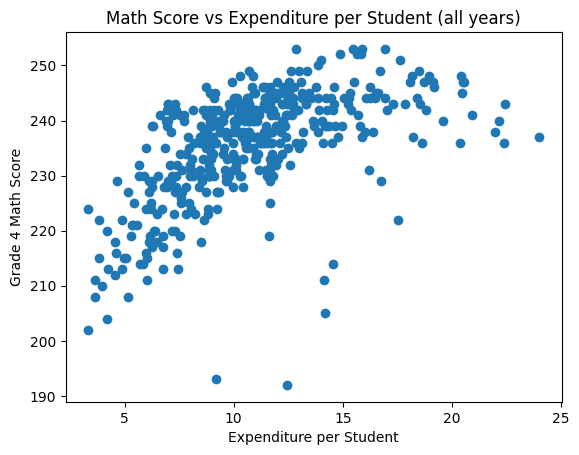

In [48]:
# @@@ 6
plt.scatter(df["expenditure_per_student"], df["AVG_MATH_4_SCORE"])
plt.xlabel("Expenditure per Student")
plt.ylabel("Grade 4 Math Score")
plt.title("Math Score vs Expenditure per Student (all years)")
plt.show()


**<Here I used the Grade 4 Math score as the y axis and the expenditure per student as the x axis to see if there is a relationship. And by looking at the graph, since there seems to be a positive relationship you can see that most likely if a state has a higher expenditure per student, average test scores for math atleast seem to be higher.>**

**Visualization 2**

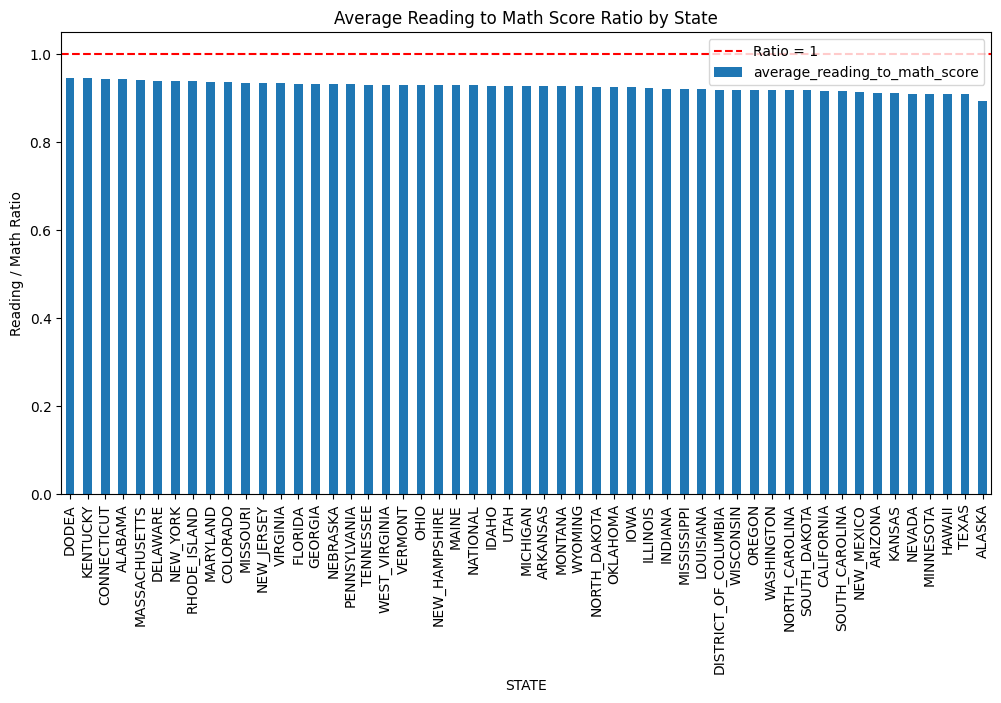

In [52]:
# @@@ 7

# Aggregate by state (average ratio)
state_ratio = df.groupby("STATE")["average_reading_to_math_score"].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
state_ratio.plot(kind="bar")
plt.ylabel("Reading / Math Ratio")
plt.title("Average Reading to Math Score Ratio by State")
plt.axhline(1, color="red", linestyle="--", label="Ratio = 1")
plt.legend()
plt.show()

**<This graph is a visual repersentation of the average_reading_to_math_score which tells you which states perform better at which subjects. If state performs better at math, the ratio is under 1 and the bar graph should be under the red line, and if the state is better at reading then it should be above the red line. In this case, it looks like evry state is on average better at math than reading for grade 4. However, I did aggregate all the years to get average reading and math scores, but for some years in the past, states have had better reading scores than math, especially farther back in the 90s. Maybe next I could see if that is true, in that did states really have better reading scores in the 90s than now, have reading scores gotten worse?>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [4]:
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# @@@ 8

# X =
# y = 

In [ ]:
# @@@ 9 

# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [ ]:
# @@@ 10
# import your sklearn class here


In [ ]:
# @@@ 11
# create your model here
# model = 

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [ ]:
# @@@ 12


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

In [ ]:
# @@@ 13

# col_name = 'COLUMN NAME OF ONE PREDICTOR'


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior On Training Set")

In [ ]:
# @@@ 14


# col_name = 'COLUMN NAME OF ONE PREDICTOR"


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")